In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
csv = pd.read_csv('../Datasets/Datasets3/C_17_dataset_18_0_upFile.csv', sep=';', encoding='ISO-8859-1')
csv.rename(columns = {'Descrizione Regione':'Regione'}, inplace = True)

#Ritorna i primi elementi di un dataset(default: 5)
print (csv.head())
print("------")
#Ritorna i tipi dei vari attributi
print (csv.dtypes)

#Lista con posti letto relativi al 2014
csv2014 = csv[csv['Anno'] == 2014]
beds2014 = csv2014['Totale posti letto']

beds2014.describe()

   Anno  Codice Regione   Regione  Codice Azienda  Tipo Azienda  \
0  2010              10  PIEMONTE             201             1   
1  2010              10  PIEMONTE             201             1   
2  2010              10  PIEMONTE             201             1   
3  2010              10  PIEMONTE             201             1   
4  2010              10  PIEMONTE             201             1   

   Codice struttura                   Denominazione struttura  \
0             10007  OSPEDALE MARTINI                           
1             10010  OSPEDALE OFTALMICO                         
2             10012  OSPEDALE EVANGELICO VALDESE                
3             10012  OSPEDALE EVANGELICO VALDESE                
4             10612  CASA DI CURA KOELLIKER OSPEDALINO          

                                  Indirizzo  Codice Comune  \
0  VIA TOFANE                                         1272   
1  VIA JUVARRA FILIPPO                                1272   
2  VIA PELLICO SILVI

count     1922
unique     400
top         20
freq        69
Name: Totale posti letto, dtype: object

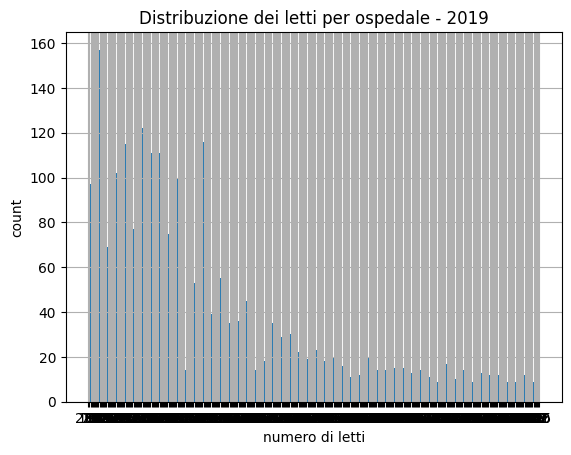

In [2]:
#primo istogramma
histo = beds2014.hist(bins=50)
histo.set_title("Distribuzione dei letti per ospedale - 2019")
histo.set_xlabel("numero di letti")
histo.set_ylabel("count")

plt.show()

In [3]:
#stampa in ordine decrescente di posti letto
csv2014 = csv2014.sort_values('Totale posti letto', ascending = False)
print(csv2014[['Denominazione struttura', 'Comune' ,'Totale posti letto']])

                       Denominazione struttura  \
8924  OSPEDALE DELLE COLLINE DELL'ALBEGNA        
9386  'CASA DI CURA PROF.DOTT. LUIGI COBELLIS'   
8849  SOL ET SALUS                               
8088  CASA DI CURA CITTA' DI BRA                 
9028              CENTRO OSPEDALIERO S.STEFANO   
...                                        ...   
8814  OSPEDALE "SANTA MARIA DELLE CROCI" RAVEN   
8047  OSPEDALE UNICO DEL VERCELLESE              
7988  OSPEDALE MARIA VITTORIA                    
8077  PRESIDIO UNIFICATO SAVIGLIANO-SALUZZO CN   
8835  OSPEDALE PRIVATO "SAN PIER DAMIANO HOSPI   

                                        Comune Totale posti letto  
8924  ORBETELLO                                                99  
9386  VALLO DELLA LUCANIA                                      99  
8849  RIMINI                                                   99  
8088  BRA                                                      99  
9028  POTENZA PICENA                                       

In [4]:
#costruzione plot bar by posti letto per comune
bedsByComune = csv2014[['Regione', 'Totale posti letto']].groupby('Regione')#groupby() permette di creare tanti gruppi a seconda del campo passato come parametri

summedAndSorted = bedsByComune.sum().sort_values('Totale posti letto')
summedAndSorted.plot.barh()
plt.show()

TypeError: no numeric data to plot

Procediamo con il caricare un dataset relativo alla popolazione per regione nell'anno 2014 (fonte: ISTAT)

   Codice regione   Regione Età    Sesso  Popolazione
0             1.0  PIEMONTE   0   Totale      28544.0
1             1.0  PIEMONTE   0   Maschi      14656.0
2             1.0  PIEMONTE   0  Femmine      13888.0
3             1.0  PIEMONTE   1   Totale      29793.0
4             1.0  PIEMONTE   1   Maschi      15269.0
------
Codice regione    float64
Regione            object
Età                object
Sesso              object
Popolazione       float64
dtype: object


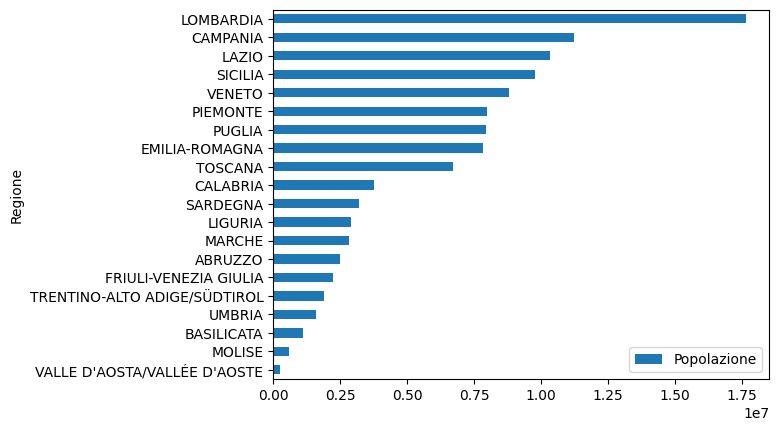

In [5]:
csv2 = pd.read_csv('./Datasets3/Ricostruzione della popolazione 2002-2019.csv', sep=';', encoding='ISO-8859-1')

csv2.infer_objects()

csv2['Regione'] = csv2['Regione'].str.upper()

#Ritorna i primi elementi di un dataset(default: 5)
print (csv2.head())
print("------")
#Ritorna i tipi dei vari attributi
print (csv2.dtypes)

#Lista di popolazioni per regione nel 2019 + istogramma descrittivo
popolazione2014byreg = csv2[['Regione', 'Popolazione']].groupby('Regione')

#print("--------------------------------")
#for key, item in popolazione2014byreg:
#    print(popolazione2014byreg.get_group(key), "\n\n")

pop_sumnsrt = popolazione2014byreg.sum().sort_values('Popolazione')
    
pop_sumnsrt.plot.barh()
plt.show()

Definiamo un rapporto posti letto/popolazione

In [6]:
srtpop = pop_sumnsrt.sort_values('Regione')
srtpl = summedAndSorted.sort_values('Regione')
print(srtpop)
print(srtpl)

                              Popolazione
Regione                                  
ABRUZZO                         2492848.0
BASILICATA                      1117526.0
CALABRIA                        3750240.0
CAMPANIA                       11225028.0
EMILIA-ROMAGNA                  7822810.0
FRIULI-VENEZIA GIULIA           2238450.0
LAZIO                          10344314.0
LIGURIA                         2889902.0
LOMBARDIA                      17632118.0
MARCHE                          2813336.0
MOLISE                           605736.0
PIEMONTE                        7993334.0
PUGLIA                          7937012.0
SARDEGNA                        3221460.0
SICILIA                         9763806.0
TOSCANA                         6726638.0
TRENTINO-ALTO ADIGE/SÜDTIROL    1911494.0
UMBRIA                          1588318.0
VALLE D'AOSTA/VALLÉE D'AOSTE     237822.0
VENETO                          8805310.0
                                                      Totale posti letto
Reg

Notiamo un'inconsistenza nei due dataframe: le province di Bolzano e Trento sono considerate come due entità semparate; mentre nell'altro sono entrambe condenzate in Trentino Alto Adege, Emilia Romagna ed Emilia-Romagna, ecc.. Risolviamo:

In [7]:
srtpl.loc['TRENTINO-ALTO ADIGE/SÜDTIROL'] = 2106+2132
srtpl.loc['EMILIA-ROMAGNA'] = 18876
srtpl.loc['FRIULI-VENEZIA GIULIA'] = 5028
srtpl.loc["VALLE D'AOSTA/VALLÉE D'AOSTE"] = 517
srtpl = srtpl.drop('PROV. AUTON. BOLZANO')
srtpl = srtpl.drop('PROV. AUTON. TRENTO')
srtpl = srtpl.drop('EMILIA ROMAGNA')
srtpl = srtpl.drop("VALLE D`AOSTA")
srtpl = srtpl.drop('FRIULI VENEZIA GIULIA')
srtpl.sort_values('Regione')
srtpop.sort_values('Regione')
print(srtpl)
print(srtpop)

                                                             Totale posti letto
Regione                                                                        
ABRUZZO                       8583876747259583575552545445403404040437328313...
BASILICATA                    8586835651484840439124161616161391221212121211...
CALABRIA                      9888879777670755555425450504944854544444440404...
CAMPANIA                      9999969591909090998998868608358280808757269686...
LAZIO                         9898969509595818080791777675716946969686767676...
LIGURIA                       8188746967635675655555034924524004043853253213...
LOMBARDIA                     9997697396959595949393919190989889898888888778...
MARCHE                        9998908878397874161659850548948454544424040439...
MOLISE                                    9654404039318242220920020201961414116
PIEMONTE                      9998989695909099878383828028076757372727170707...
PUGLIA                        9898979695

Procediamo con l'effettuare un rapporto posti letto/cittadini

In [8]:
frame = [srtpl, srtpop]
df_join = srtpl.join(srtpop)
df_join

,Totale posti letto,Popolazione
Regione,,
ABRUZZO,8583876747259583575552545445403404040437328313...,2492848.0
BASILICATA,8586835651484840439124161616161391221212121211...,1117526.0
CALABRIA,9888879777670755555425450504944854544444440404...,3750240.0
CAMPANIA,9999969591909090998998868608358280808757269686...,11225028.0
LAZIO,9898969509595818080791777675716946969686767676...,10344314.0
LIGURIA,8188746967635675655555034924524004043853253213...,2889902.0
LOMBARDIA,9997697396959595949393919190989889898888888778...,17632118.0
MARCHE,9998908878397874161659850548948454544424040439...,2813336.0
MOLISE,9654404039318242220920020201961414116,605736.0


Eseguiamo infine un rapporto posti letto/popolazione e conseguente rappresentazione grafica:

In [9]:
ratio = pd.DataFrame(df_join)
ratio['Rapporto'] = df_join['Totale posti letto']/df_join['Popolazione']
print(ratio)
ratio['Rapporto'].plot.barh()
plt.show()

TypeError: unsupported operand type(s) for /: 'str' and 'float'